A stability map paradigm for the case of $m_+/m_-=1.25$ and $Λ_+/Λ_-=1.25$.
We import the mrat1.25Lrat1.2.txt file generated from the global scanner mathematica file found in [Static-Thin-Shells-in-SdS-Spacetimes](https://github.com/Dimitrios1993/Static-Thin-Shells-in-SdS-Spacetimes) public github repository

<>:48: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
<>:48: SyntaxWarning: invalid escape sequence '\l'
<>:59: SyntaxWarning: invalid escape sequence '\p'
<>:60: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-4067853769.py:48: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\lambda$', fontsize=18)
/tmp/ipython-input-4067853769.py:59: SyntaxWarning: invalid escape sequence '\p'
  red_patch = mpatches.Patch(color=color_unstable, label='Unstable ($V_{eff}(R_0)^{\prime\prime} < 0$)')
/tmp/ipython-input-4067853769.py:60: SyntaxWarning: invalid escape sequence '\p'
  green_patch = mpatches.Patch(color=color_stable, label='Stable ($V_{eff}(R_0)^{\prime\prime} > 0$)')


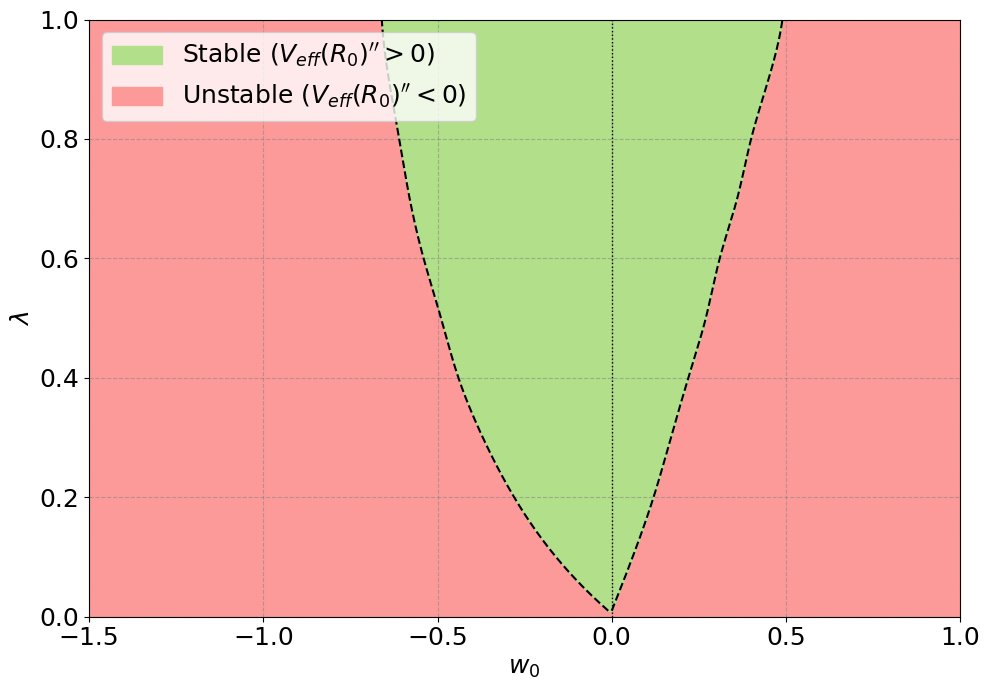

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline
import matplotlib.patches as mpatches

# 1. Load the Data
try:
    df = pd.read_csv('mrat1.25Lrat1.25.txt', sep='\t', header=None, names=['Lambda', 'w', 'Stability', 'R0', 'Sigma0'])
except:
    df = pd.read_csv('mrat1.25Lrat1.25.txt', delim_whitespace=True, header=None, names=['Lambda', 'w', 'Stability', 'R0', 'Sigma0'])

# 2. Extract Boundary Points
stable_df = df[df['Stability'] == 1]
boundaries = stable_df.groupby('Lambda')['w'].agg(['min', 'max']).reset_index()
boundaries = boundaries.sort_values('Lambda')

lam = boundaries['Lambda'].values
w_min = boundaries['min'].values
w_max = boundaries['max'].values

# 3. Create Smooth Curves
lam_smooth = np.linspace(lam.min(), 1.0, 300)
spl_min = make_interp_spline(lam, w_min, k=3)
w_min_smooth = spl_min(lam_smooth)
spl_max = make_interp_spline(lam, w_max, k=3)
w_max_smooth = spl_max(lam_smooth)

# 4. Plotting
plt.figure(figsize=(10, 7))

# Colors
color_stable = '#b2df8a'   # Soft Green
color_unstable = '#fb9a99' # Soft Red/Pink

# A. Fill Background (Unstable)
plt.gca().set_facecolor(color_unstable)

# B. Fill Stable Region
plt.fill_betweenx(lam_smooth, w_min_smooth, w_max_smooth, color=color_stable, alpha=1.0)

# C. Draw Boundary Curves (Dashed, Thinner)
plt.plot(w_min_smooth, lam_smooth, color='black', linewidth=1.5, linestyle='--')
plt.plot(w_max_smooth, lam_smooth, color='black', linewidth=1.5, linestyle='--')

# 5. Formatting
plt.xlabel('$w_0$', fontsize=18)
plt.ylabel('$\lambda$', fontsize=18)


plt.tick_params(axis='both', which='major', labelsize=18)

plt.xlim(-1.5, 1.0)
plt.ylim(0, 1.0)
plt.grid(True, linestyle='--', alpha=0.5, color='gray')
plt.axvline(0, color='black', linestyle=':', linewidth=1)


red_patch = mpatches.Patch(color=color_unstable, label='Unstable ($V_{eff}(R_0)^{\prime\prime} < 0$)')
green_patch = mpatches.Patch(color=color_stable, label='Stable ($V_{eff}(R_0)^{\prime\prime} > 0$)')


plt.legend(handles=[green_patch, red_patch], loc='upper left', fontsize=18)

plt.tight_layout()
plt.savefig('final_plot_colors.png')
plt.show()

Heatmaps from the case above


--- Normalization Units ---
Radius Unit (R_s) = 2.9533e+13 m
Sigma Unit        = 2.2798e+13 kg/m^2


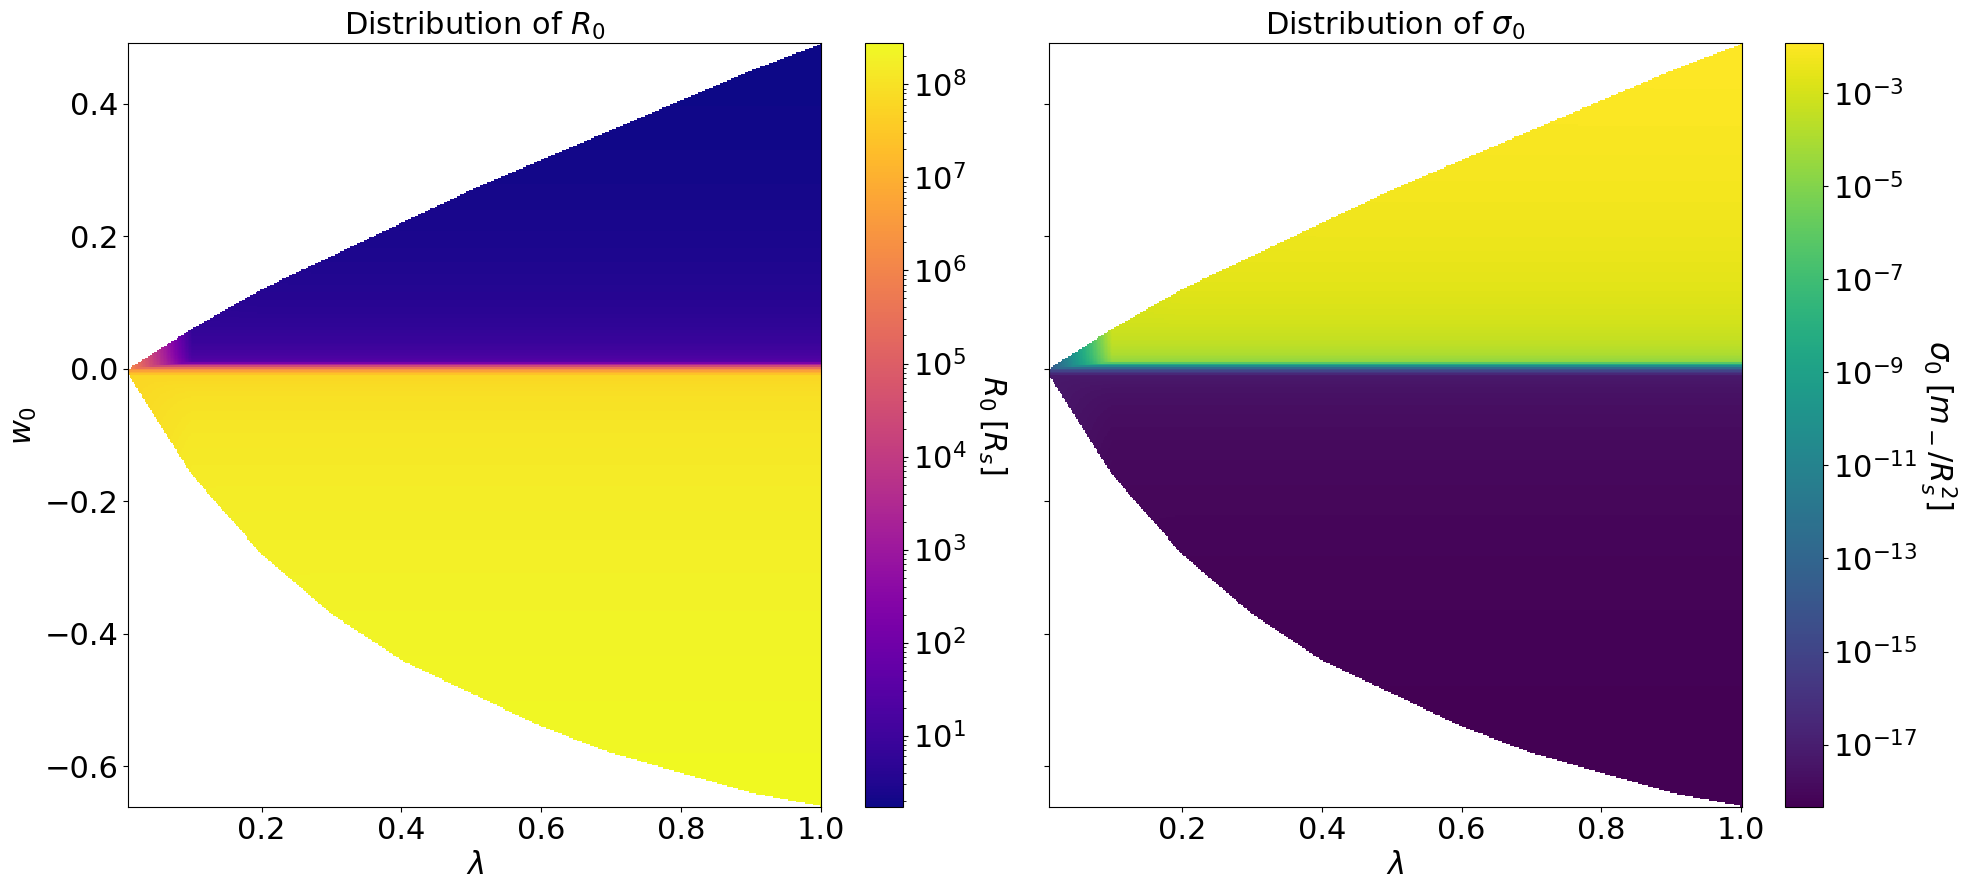

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.colors as colors
import matplotlib.ticker as ticker  # Added for tick formatting

# ==========================================
# 1. PHYSICAL CONSTANTS & NORMALIZATION SCALES
# ==========================================
G = 6.6743e-11
c = 299792.458e3
# m_minus = 10^10 Solar Masses
m_minus = 1e10 * (1.988416e30)

# --- A. Calculate Schwarzschild Radius (Rs) ---
# Rs = 2GM / c^2
R_s = (2 * G * m_minus) / c**2

# --- B. Calculate Sigma Unit ---
# Unit = m_- / Rs^2
Sigma_scale = m_minus / (R_s**2)

print(f"--- Normalization Units ---")
print(f"Radius Unit (R_s) = {R_s:.4e} m")
print(f"Sigma Unit        = {Sigma_scale:.4e} kg/m^2")

# ==========================================
# 2. HELPER FUNCTION (FORMATTING)
# ==========================================
def fmt_math(x, pos):
    """Scientific notation for ticks (e.g. 5 · 10^-3)"""
    if x == 0: return "$0$"
    exponent = int(np.floor(np.log10(x)))
    mantissa = x / 10**exponent
    if np.isclose(mantissa, 1.0):
        return rf'$10^{{{exponent}}}$'
    else:
        return rf'${mantissa:.0f} \cdot 10^{{{exponent}}}$'

# ==========================================
# 3. LOAD DATA
# ==========================================
try:
    data = np.loadtxt('mrat1.25Lrat1.25.txt')
except OSError:
    try:
        import pandas as pd
        df = pd.read_csv('mrat1.25Lrat1.25.txt', delim_whitespace=True, header=None)
        data = df.values
    except:
        print("Error: 'mrat1.25Lrat1.25.txt' not found.")
        print("Generating dummy data for testing...")
        data = np.random.rand(100, 5)
        data[:, 2] = 1 # Set stability to 1
        data[:, 3] = data[:, 3] * 1e25 # Large R0
        data[:, 4] = data[:, 4] * 1e13 # Large Sigma

# Extract columns
lam = data[:, 0]
w = data[:, 1]
stability = data[:, 2]
r0 = data[:, 3]
sigma0 = data[:, 4]

# 4. FILTER: Keep ONLY valid solutions
mask = (stability == 1) & (r0 > 0) & (sigma0 > 0)
lam_valid = lam[mask]
w_valid = w[mask]
r0_valid = r0[mask]
sigma0_valid = sigma0[mask]

# ==========================================
# 5. GRID DEFINITION & INTERPOLATION
# ==========================================
if len(lam_valid) > 0:
    # Create Grid
    grid_lam, grid_w = np.mgrid[min(lam_valid):max(lam_valid):500j,
                                min(w_valid):max(w_valid):500j]

    # --- NORMALIZE BEFORE LOGGING ---
    r0_norm = r0_valid / R_s
    sigma0_norm = sigma0_valid / Sigma_scale

    # Log Interpolation on NORMALIZED values
    log_r0_norm = np.log10(r0_norm)
    log_sigma0_norm = np.log10(sigma0_norm)

    grid_log_r0 = griddata((lam_valid, w_valid), log_r0_norm, (grid_lam, grid_w), method='linear')
    grid_log_sigma0 = griddata((lam_valid, w_valid), log_sigma0_norm, (grid_lam, grid_w), method='linear')

    # Convert back to linear space (these are now dimensionless ratios)
    grid_r0 = 10**grid_log_r0
    grid_sigma0 = 10**grid_log_sigma0

    # ==========================================
    # 6. PLOTTING
    # ==========================================
    fig, axes = plt.subplots(1, 2, figsize=(20, 9), sharey=True)

    # --- Plot R0 ---
    pcm1 = axes[0].pcolormesh(grid_lam, grid_w, grid_r0,
                              norm=colors.LogNorm(), cmap='plasma', shading='auto')

    axes[0].set_title(r'Distribution of $R_0$', fontsize=22)
    axes[0].set_xlabel(r'$\lambda$', fontsize=22)
    axes[0].set_ylabel(r'$w_0$', fontsize=22)
    axes[0].tick_params(axis='both', which='major', labelsize=22)

    cbar1 = fig.colorbar(pcm1, ax=axes[0])
    # Label with Unit
    cbar1.set_label(r'$R_0 \; [R_s]$', rotation=270, labelpad=30, fontsize=22)
    cbar1.ax.tick_params(labelsize=22)
    # Apply Clean Formatting
    cbar1.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))

    # --- Plot Sigma0 ---
    pcm2 = axes[1].pcolormesh(grid_lam, grid_w, grid_sigma0,
                              norm=colors.LogNorm(), cmap='viridis', shading='auto')

    axes[1].set_title(r'Distribution of $\sigma_0$', fontsize=22)
    axes[1].set_xlabel(r'$\lambda$', fontsize=22)
    axes[1].tick_params(axis='both', which='major', labelsize=22)

    cbar2 = fig.colorbar(pcm2, ax=axes[1])
    # Label with Unit
    cbar2.set_label(r'$\sigma_0 \; [m_- / R_s^2]$', rotation=270, labelpad=30, fontsize=22)
    cbar2.ax.tick_params(labelsize=22)
    # Apply Clean Formatting
    cbar2.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))

    plt.tight_layout()
    # plt.savefig('Corrected_Distribution_Units.png', dpi=300)
    plt.show()

else:
    print("No stable points found to plot.")

Figure 1 of our paper. Notice that we run the 2nd case with step 0.0001 for greater accuracy.

--- Calculated SI Values ---
Mass (m_-)      = 1.988416e+40 kg
Radius (R_s)    = 2.953259e+13 m
Sigma Unit      = 2.279839e+13 kg/m^2


/tmp/ipython-input-1919066458.py:217: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


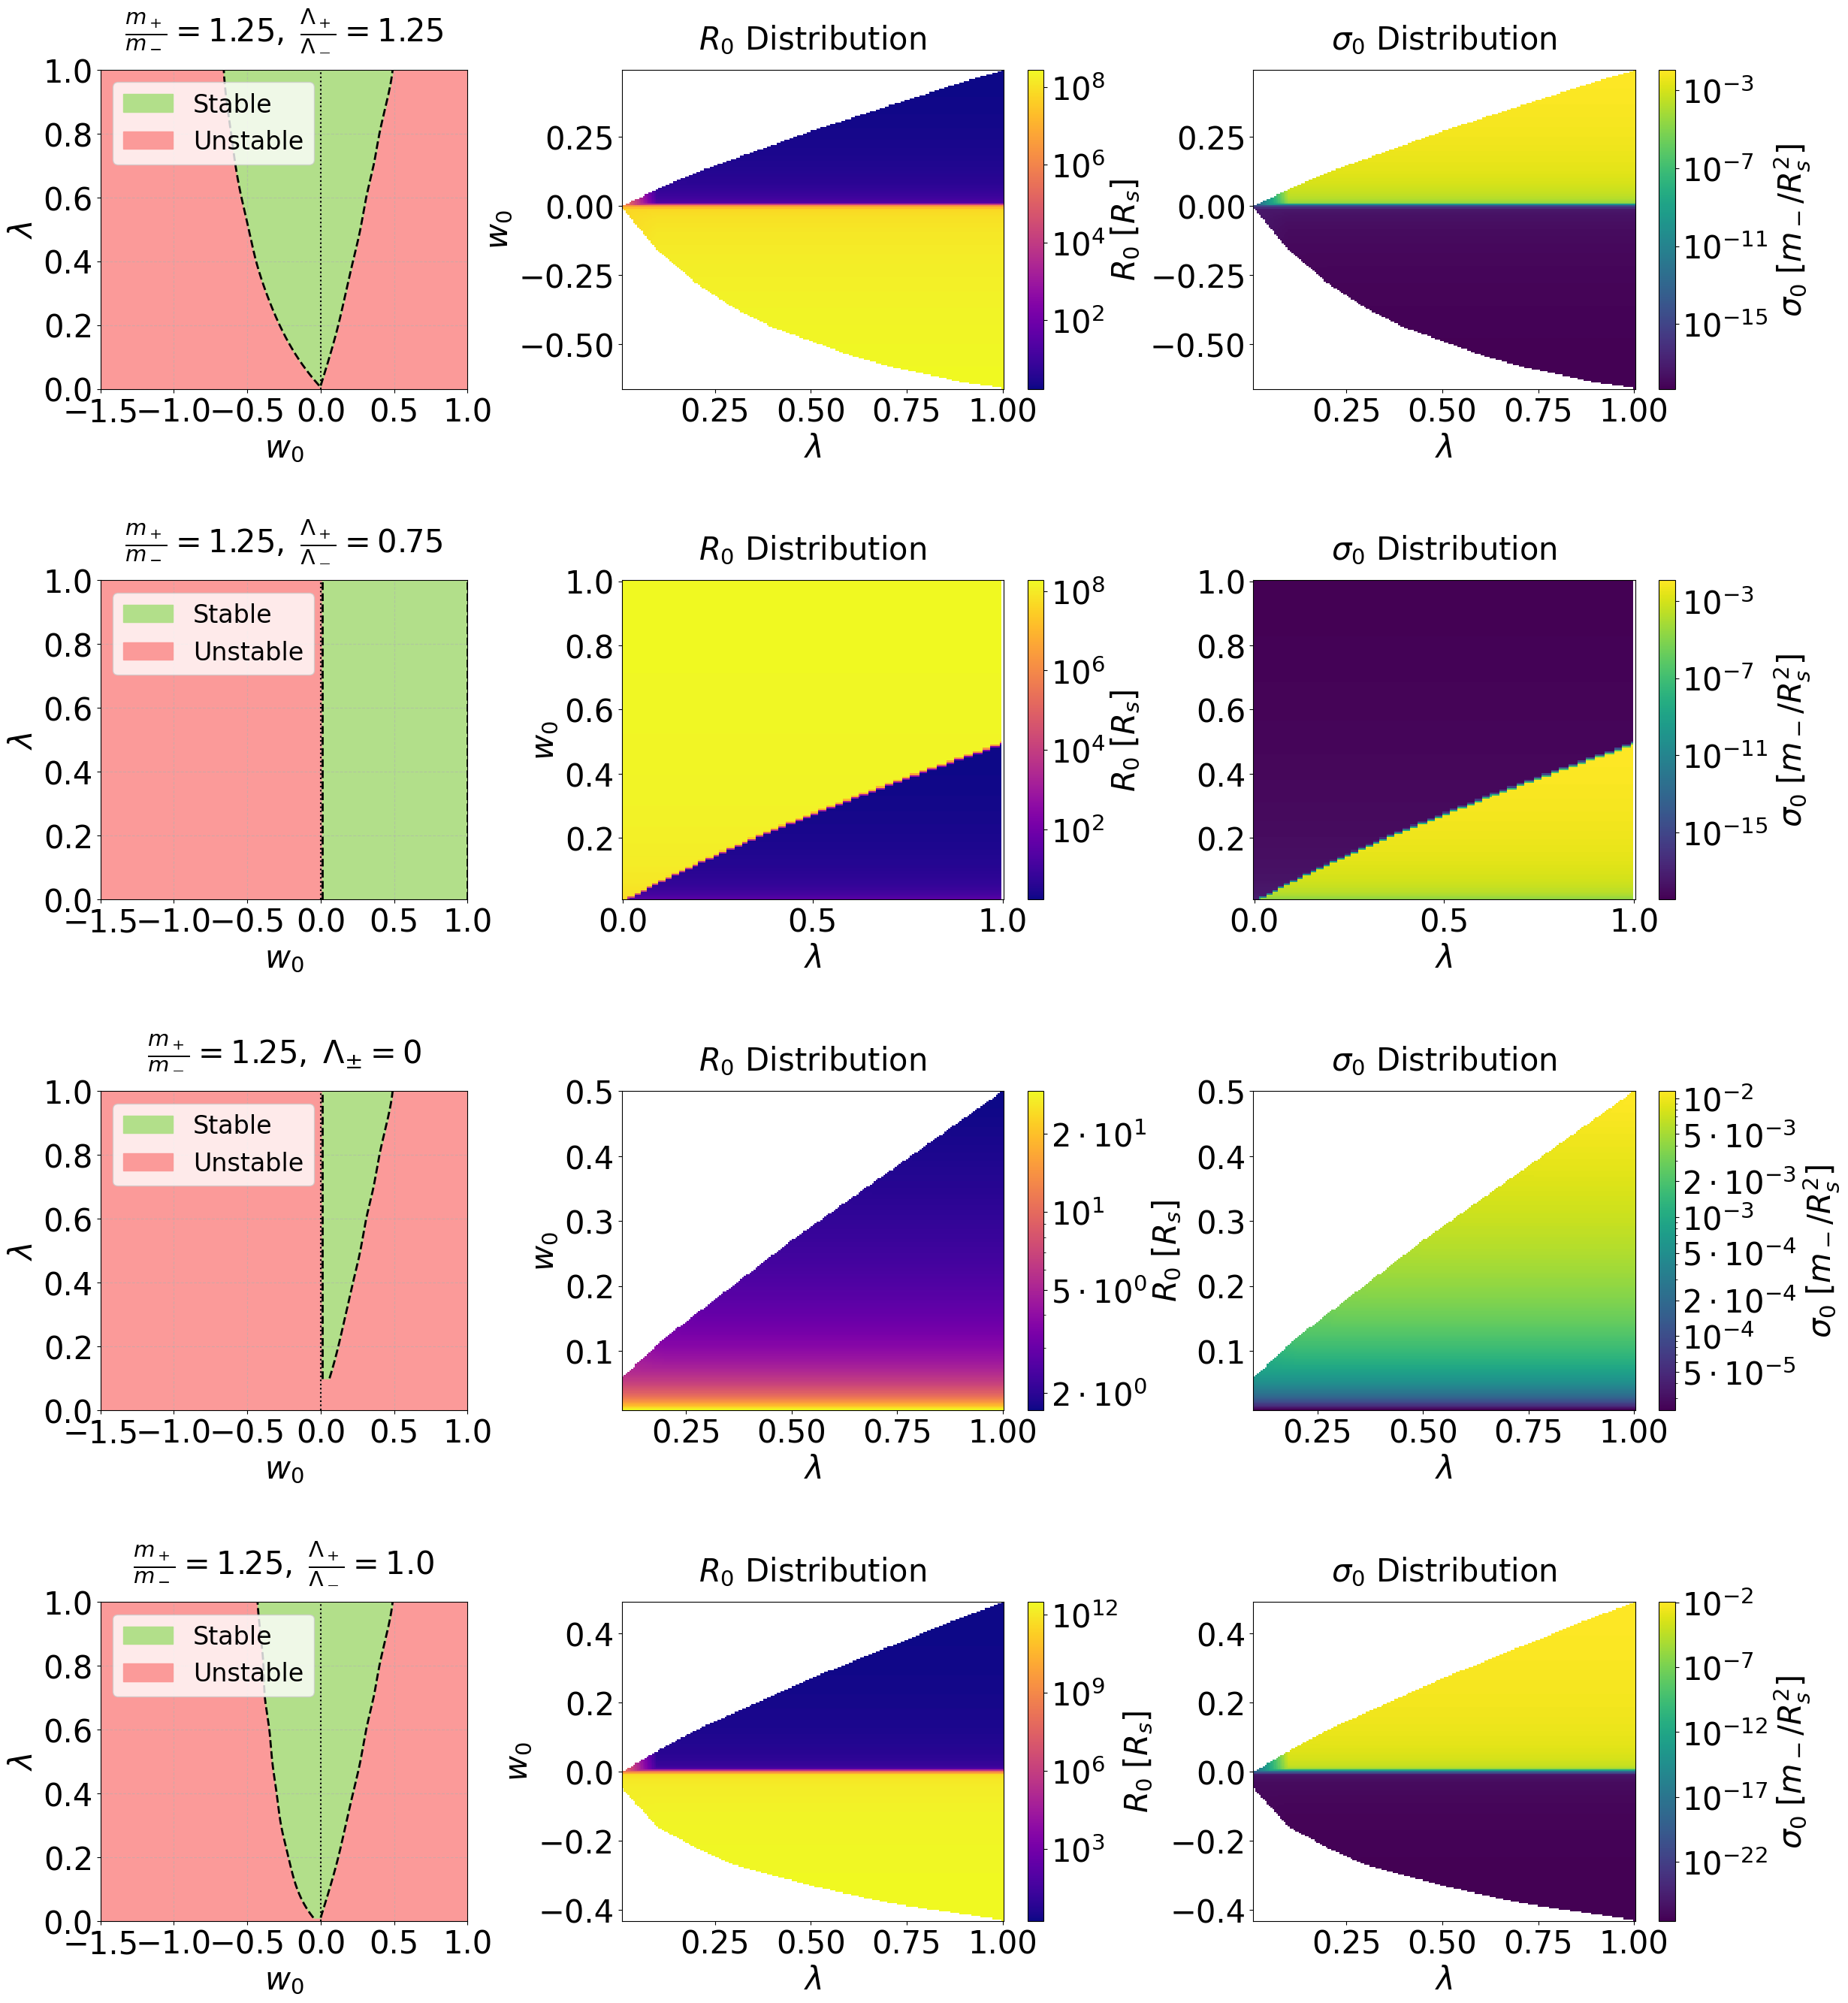

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline, griddata
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

# ==========================================
# 1. PHYSICAL CONSTANTS & NORMALIZATION SCALES
# ==========================================
G = 6.6743e-11
c = 299792.458e3
# m_minus = 10^10 Solar Masses
m_minus = 1e10 * (1.988416e30)

# --- A. Calculate Schwarzschild Radius (Rs) ---
# Rs = 2GM / c^2
R_s = (2 * G * m_minus) / c**2

# --- B. Calculate Sigma Unit ---
# Unit = m_- / Rs^2
Sigma_scale = m_minus / (R_s**2)

print(f"--- Calculated SI Values ---")
print(f"Mass (m_-)      = {m_minus:.6e} kg")
print(f"Radius (R_s)    = {R_s:.6e} m")
print(f"Sigma Unit      = {Sigma_scale:.6e} kg/m^2")

# ==========================================
# 2. CONFIGURATION
# ==========================================
FONT_TITLE    = 30
FONT_AXIS_LBL = 30
FONT_TICK_LBL = 30
FONT_LEGEND   = 24

# ==========================================
# 3. HELPER FUNCTIONS
# ==========================================
def fmt_math(x, pos):
    """Scientific notation for ticks (e.g. 5 · 10^-3)"""
    if x == 0: return "$0$"
    exponent = int(np.floor(np.log10(x)))
    mantissa = x / 10**exponent
    if np.isclose(mantissa, 1.0):
        return rf'$10^{{{exponent}}}$'
    else:
        return rf'${mantissa:.0f} \cdot 10^{{{exponent}}}$'

def get_custom_ticks(data_min, data_max):
    if data_min <= 0: data_min = 1e-50
    ticks = []
    min_pow = int(np.floor(np.log10(data_min)))
    max_pow = int(np.ceil(np.log10(data_max)))
    for p in range(min_pow, max_pow + 1):
        for s in [1, 2, 5]:
            val = s * 10**p
            if data_min <= val <= data_max:
                ticks.append(val)
    if not ticks:
        ticks = [data_min, data_max]
    return ticks

# ==========================================
# 4. CASE SETUP
# ==========================================
cases = [
    {
        'file': 'mrat1.25Lrat1.25.txt',
        'title': r"$\frac{m_+}{m_-}=1.25,\;\frac{\Lambda_+}{\Lambda_-}=1.25$",
        'special_ticks': False, 'extrapolate': False
    },
    {
        'file': 'mrat1.25Lrat0.75step0.0001.txt',
        'title': r"$\frac{m_+}{m_-}=1.25,\;\frac{\Lambda_+}{\Lambda_-}=0.75$",
        'special_ticks': False, 'extrapolate': False
    },
    {
        'file': 'mrat1.25L0.txt',
        'title': r"$\frac{m_+}{m_-}=1.25,\;\Lambda_{\pm}=0$",
        'special_ticks': True, 'extrapolate': True
    },
    {
        'file': 'mrat1.25Lrat1.txt',
        'title': r"$\frac{m_+}{m_-}=1.25,\;\frac{\Lambda_+}{\Lambda_-}=1.0$",
        'special_ticks': False, 'extrapolate': False
    }
]

COLOR_STABLE = '#b2df8a'
COLOR_UNSTABLE = '#fb9a99'

# ==========================================
# 5. MAIN PLOTTING LOOP
# ==========================================
fig = plt.figure(figsize=(28, 32))


gs = gridspec.GridSpec(4, 3, width_ratios=[1, 1.3, 1.3],
                       wspace=0.35, hspace=0.6)

for i, case in enumerate(cases):
    filename = case['file']
    case_title = case['title']

    try:
        df = pd.read_csv(filename, sep='\t', header=None,
                         names=['Lambda', 'w', 'Stability', 'R0', 'Sigma0'])
    except:
        df = pd.read_csv(filename, delim_whitespace=True, header=None,
                         names=['Lambda', 'w', 'Stability', 'R0', 'Sigma0'])
    df = df.apply(pd.to_numeric, errors='coerce').dropna()

    ax_stab = fig.add_subplot(gs[i, 0])
    ax_r0   = fig.add_subplot(gs[i, 1])
    ax_sig  = fig.add_subplot(gs[i, 2])

    # ---- 1. STABILITY MAP ----
    stable_df = df[df['Stability'] == 1]
    ax_stab.set_facecolor(COLOR_UNSTABLE)

    if not stable_df.empty:
        bounds = stable_df.groupby('Lambda')['w'].agg(['min', 'max']).reset_index()
        lam_b = bounds['Lambda'].values
        wmin  = bounds['min'].values
        wmax  = bounds['max'].values

        if len(lam_b) > 3:
            lam_s = np.linspace(lam_b.min(), lam_b.max(), 300)
            try:
                wmin = make_interp_spline(lam_b, wmin, k=3)(lam_s)
                wmax = make_interp_spline(lam_b, wmax, k=3)(lam_s)
                lam_b = lam_s
            except:
                pass

        ax_stab.fill_betweenx(lam_b, wmin, wmax, color=COLOR_STABLE)
        ax_stab.plot(wmin, lam_b, 'k--', lw=2)
        ax_stab.plot(wmax, lam_b, 'k--', lw=2)

    ax_stab.set_xlim(-1.5, 1.0)
    ax_stab.set_ylim(0, 1.0)
    ax_stab.set_xlabel(r'$w_0$', fontsize=FONT_AXIS_LBL)
    ax_stab.set_ylabel(r'$\lambda$', fontsize=FONT_AXIS_LBL)

    # CHANGE 2: Added pad=30 to lift the title off the frame
    ax_stab.set_title(case_title, fontsize=FONT_TITLE, pad=30)

    ax_stab.tick_params(labelsize=FONT_TICK_LBL)
    ax_stab.grid(True, linestyle='--', alpha=0.5)
    ax_stab.axvline(0, color='black', linestyle=':')
    ax_stab.xaxis.set_major_locator(ticker.MultipleLocator(0.5))

    ax_stab.legend(handles=[
        mpatches.Patch(color=COLOR_STABLE, label='Stable'),
        mpatches.Patch(color=COLOR_UNSTABLE, label='Unstable')
    ], fontsize=FONT_LEGEND, loc='upper left')

    # ---- 2. HEATMAPS ----
    mask = (df['Stability'] == 1) & (df['R0'] > 0) & (df['Sigma0'] > 0)
    lam_raw, w_raw = df.loc[mask, ['Lambda', 'w']].values.T
    r0_raw, sig_raw = df.loc[mask, ['R0', 'Sigma0']].values.T

    # --- APPLY NORMALIZATION ---
    r0_norm = r0_raw / R_s
    sig_norm = sig_raw / Sigma_scale

    if len(lam_raw) == 0: continue

    # Extrapolation
    if case['extrapolate'] and w_raw.max() < 0.5:
        top = np.where(w_raw >= w_raw.max() - 0.01)
        lam_raw = np.concatenate([lam_raw, lam_raw[top]])
        w_raw   = np.concatenate([w_raw, np.full_like(lam_raw[top], 0.5)])
        r0_norm  = np.concatenate([r0_norm, r0_norm[top]])
        sig_norm = np.concatenate([sig_norm, sig_norm[top]])

    wl = (lam_raw.min(), lam_raw.max())
    ww = (w_raw.min(), 0.5 if case['extrapolate'] else w_raw.max())
    gl, gw = np.mgrid[wl[0]:wl[1]:200j, ww[0]:ww[1]:200j]

    gr0  = 10**griddata((lam_raw, w_raw), np.log10(r0_norm),  (gl, gw))
    gsig = 10**griddata((lam_raw, w_raw), np.log10(sig_norm), (gl, gw))

    pcm1 = ax_r0.pcolormesh(gl, gw, gr0, norm=colors.LogNorm(), cmap='plasma', shading='auto')
    pcm2 = ax_sig.pcolormesh(gl, gw, gsig, norm=colors.LogNorm(), cmap='viridis', shading='auto')

    # Titles (Plain)
    ax_r0.set_title(r'$R_0$ Distribution', fontsize=FONT_TITLE, pad=20)
    ax_sig.set_title(r'$\sigma_0$ Distribution', fontsize=FONT_TITLE, pad=20)

    for ax in (ax_r0, ax_sig):
        ax.set_xlabel(r'$\lambda$', fontsize=FONT_AXIS_LBL)
        ax.tick_params(labelsize=FONT_TICK_LBL)
        if case['extrapolate']: ax.set_ylim(top=0.5)

    ax_r0.set_ylabel(r'$w_0$', fontsize=FONT_AXIS_LBL)

    c1 = fig.colorbar(pcm1, ax=ax_r0)
    c2 = fig.colorbar(pcm2, ax=ax_sig)

    c1.set_label(r'$R_0 \; [R_s]$', fontsize=FONT_AXIS_LBL)
    c2.set_label(r'$\sigma_0 \; [m_- / R_s^2]$', fontsize=FONT_AXIS_LBL)

    c1.ax.tick_params(labelsize=FONT_TICK_LBL)
    c2.ax.tick_params(labelsize=FONT_TICK_LBL)

    if case['special_ticks']:
        c1.set_ticks(get_custom_ticks(np.nanmin(gr0), np.nanmax(gr0)))
        c2.set_ticks(get_custom_ticks(np.nanmin(gsig), np.nanmax(gsig)))

    c1.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))
    c2.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))

plt.tight_layout()
plt.savefig('combined_analysis_final_padded.png', dpi=300)
plt.show()

Fig.2 of the paper


/tmp/ipython-input-3596893859.py:213: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


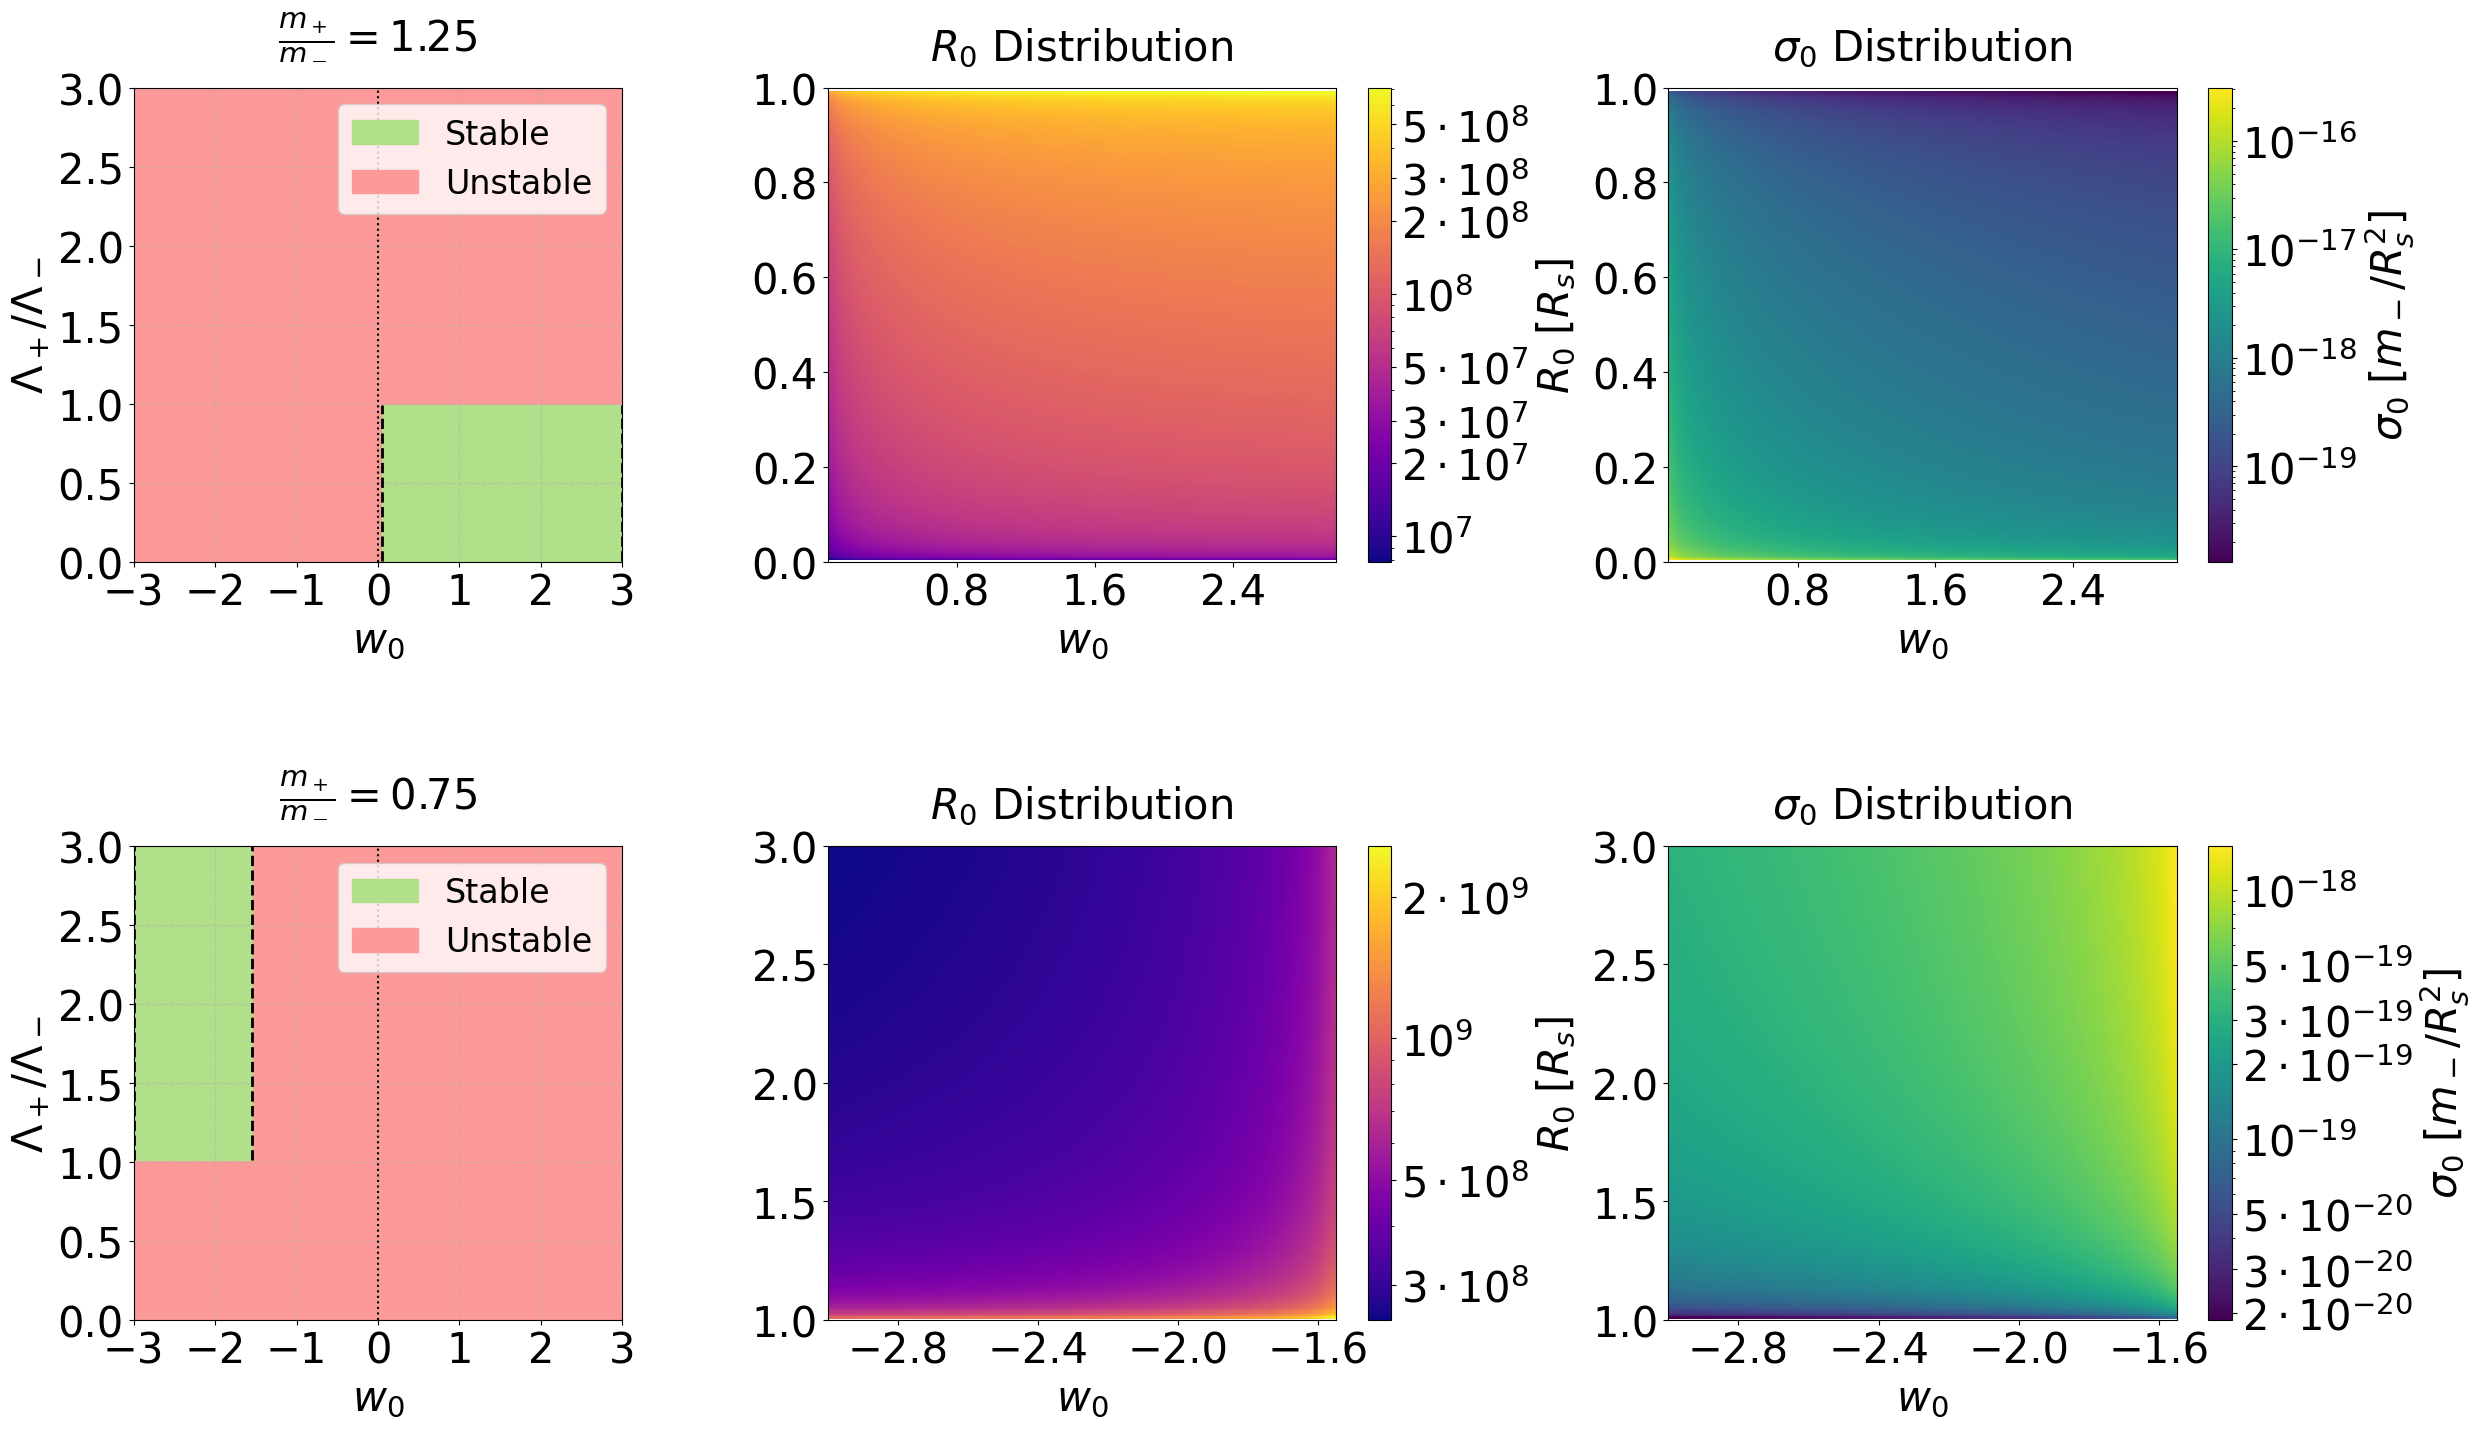

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline, griddata
import matplotlib.patches as mpatches
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker

# ==========================================
# 1. PHYSICAL CONSTANTS
# ==========================================
G = 6.6743e-11
c = 299792.458e3
m_minus = 1e10 * (1.988416e30)
R_s = (2 * G * m_minus) / c**2
Sigma_scale = m_minus / (R_s**2)

# ==========================================
# 2. CONFIGURATION
# ==========================================
FONT_TITLE    = 30
FONT_AXIS_LBL = 30
FONT_TICK_LBL = 30
FONT_LEGEND   = 24

COLOR_STABLE   = '#b2df8a'
COLOR_UNSTABLE = '#fb9a99'

# ==========================================
# 3. HELPER FUNCTIONS
# ==========================================
def fmt_math(x, pos):
    if x == 0 or not np.isfinite(x): return ""
    exponent = int(np.floor(np.log10(abs(x))))
    mantissa = x / 10**exponent

    if np.isclose(mantissa, 1.0, atol=0.1):
        return rf'$10^{{{exponent}}}$'
    elif np.isclose(mantissa, round(mantissa), atol=0.1):
        return rf'${int(round(mantissa))} \cdot 10^{{{exponent}}}$'
    else:
        return rf'${mantissa:.1f} \cdot 10^{{{exponent}}}$'

# ==========================================
# 4. CASE SETUP
# ==========================================
cases = [
    {
        'file': 'newRatioScan_mratio1.25.txt',
        'title': r"$\frac{m_+}{m_-}=1.25$",
        'heatmap_ylim': (0.0, 1.0)
    },
    {
        'file': 'newRatioScan_mratio0.75.txt',
        'title': r"$\frac{m_+}{m_-}=0.75$",
        'heatmap_ylim': (1.0, 3.0)
    }
]

# ==========================================
# 5. MAIN PLOTTING LOOP
# ==========================================
fig = plt.figure(figsize=(28, 16))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1.3, 1.3],
                       wspace=0.35, hspace=0.6)

for i, case in enumerate(cases):
    filename = case['file']
    case_title = case['title']
    ylim_hm = case['heatmap_ylim']

    # --- LOAD DATA ---
    try:
        df = pd.read_csv(filename, sep='\t', header=None, names=['Ratio', 'w', 'Stability', 'R0', 'Sigma0'])
    except:
        df = pd.read_csv(filename, delim_whitespace=True, header=None, names=['Ratio', 'w', 'Stability', 'R0', 'Sigma0'])

    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    stable_df = df[df['Stability'] == 1]

    # --- CALCULATE ZOOM LIMITS ---
    if not stable_df.empty:
        w_min_zoom = stable_df['w'].min()
        w_max_zoom = stable_df['w'].max()
    else:
        w_min_zoom, w_max_zoom = -3.0, 3.0

    # Subplots
    ax_stab = fig.add_subplot(gs[i, 0])
    ax_r0   = fig.add_subplot(gs[i, 1])
    ax_sig  = fig.add_subplot(gs[i, 2])

    # --------------------------
    # COL 1: STABILITY MAP
    # --------------------------
    ax_stab.set_facecolor(COLOR_UNSTABLE)

    if not stable_df.empty:
        left_df = stable_df[stable_df['w'] < -0.5]
        right_df = stable_df[stable_df['w'] > -0.5]

        def draw_region_smooth(ax, region_df):
            if region_df.empty: return
            bounds = region_df.groupby('Ratio')['w'].agg(['min', 'max']).reset_index().sort_values('Ratio')
            lam_b = bounds['Ratio'].values
            wmin = bounds['min'].values
            wmax = bounds['max'].values

            if len(lam_b) > 3:
                lam_s = np.linspace(lam_b.min(), lam_b.max(), 300)
                try:
                    wmin_s = make_interp_spline(lam_b, wmin, k=3)(lam_s)
                    wmax_s = make_interp_spline(lam_b, wmax, k=3)(lam_s)
                    ax.fill_betweenx(lam_s, wmin_s, wmax_s, color=COLOR_STABLE)
                    ax.plot(wmin_s, lam_s, 'k--', lw=2)
                    ax.plot(wmax_s, lam_s, 'k--', lw=2)
                except:
                    ax.fill_betweenx(lam_b, wmin, wmax, color=COLOR_STABLE)
            else:
                ax.fill_betweenx(lam_b, wmin, wmax, color=COLOR_STABLE)

        draw_region_smooth(ax_stab, left_df)
        draw_region_smooth(ax_stab, right_df)

    ax_stab.set_xlim(-3.0, 3.0)
    ax_stab.set_ylim(0, 3.0)
    ax_stab.set_xlabel(r'$w_0$', fontsize=FONT_AXIS_LBL)
    ax_stab.set_ylabel(r'$\Lambda_+ / \Lambda_-$', fontsize=FONT_AXIS_LBL)
    ax_stab.set_title(case_title, fontsize=FONT_TITLE, pad=30)
    ax_stab.tick_params(labelsize=FONT_TICK_LBL)
    ax_stab.grid(True, linestyle='--', alpha=0.5)
    ax_stab.axvline(0, color='black', linestyle=':')
    ax_stab.xaxis.set_major_locator(ticker.MultipleLocator(1.0))
    ax_stab.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax_stab.legend(handles=[
        mpatches.Patch(color=COLOR_STABLE, label='Stable'),
        mpatches.Patch(color=COLOR_UNSTABLE, label='Unstable')
    ], fontsize=FONT_LEGEND, loc='upper right')

    # --------------------------
    # COL 2 & 3: HEATMAPS
    # --------------------------
    ax_r0.set_facecolor('white')
    ax_sig.set_facecolor('white')

    if not stable_df.empty:
        mask = (df['Stability'] == 1) & (df['R0'] > 0) & (df['Sigma0'] > 0)
        lam_vals = df.loc[mask, 'Ratio'].values
        w_vals   = df.loc[mask, 'w'].values
        r0_vals  = df.loc[mask, 'R0'].values / R_s
        sig_vals = df.loc[mask, 'Sigma0'].values / Sigma_scale

        gl, gw = np.mgrid[ylim_hm[0]:ylim_hm[1]:200j, w_min_zoom:w_max_zoom:200j]
        gr0  = 10**griddata((lam_vals, w_vals), np.log10(r0_vals),  (gl, gw), method='linear')
        gsig = 10**griddata((lam_vals, w_vals), np.log10(sig_vals), (gl, gw), method='linear')

        pcm1 = ax_r0.pcolormesh(gw, gl, gr0, norm=colors.LogNorm(), cmap='plasma', shading='auto')
        pcm2 = ax_sig.pcolormesh(gw, gl, gsig, norm=colors.LogNorm(), cmap='viridis', shading='auto')

        c1 = fig.colorbar(pcm1, ax=ax_r0)
        c2 = fig.colorbar(pcm2, ax=ax_sig)

        c1.set_label(r'$R_0 \; [R_s]$', fontsize=FONT_AXIS_LBL)
        c2.set_label(r'$\sigma_0 \; [m_- / R_s^2]$', fontsize=FONT_AXIS_LBL)
        c1.ax.tick_params(labelsize=FONT_TICK_LBL)
        c2.ax.tick_params(labelsize=FONT_TICK_LBL)

        # --- SMART TICK LOGIC ---

        # 1. Standard Dense Ticks (Powers of 10 AND 2x, 3x, 5x)
        dense_subs = (1.0, 2.0, 3.0, 5.0)
        # 2. Sparse Ticks (Just Powers of 10)
        sparse_subs = (1.0,)

        # Apply Dense Ticks Generally
        c1.locator = ticker.LogLocator(base=10, subs=dense_subs, numticks=15)

        # SPECIAL CHECK: If it's the first case (i=0) and Sigma plot, use Sparse Ticks
        if i == 0:
            c2.locator = ticker.LogLocator(base=10, subs=sparse_subs, numticks=15)
        else:
            c2.locator = ticker.LogLocator(base=10, subs=dense_subs, numticks=15)

        c1.update_ticks()
        c2.update_ticks()

        c1.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))
        c2.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))

        # Fallback to ensure ticks exist if range is tiny
        if len(c1.get_ticks()) < 2:
            c1.set_ticks([np.nanmin(gr0), np.nanmax(gr0)])
            c1.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))
        if len(c2.get_ticks()) < 2:
            c2.set_ticks([np.nanmin(gsig), np.nanmax(gsig)])
            c2.ax.yaxis.set_major_formatter(ticker.FuncFormatter(fmt_math))

    # Formatting Heatmaps
    ax_r0.set_title(r'$R_0$ Distribution', fontsize=FONT_TITLE, pad=20)
    ax_sig.set_title(r'$\sigma_0$ Distribution', fontsize=FONT_TITLE, pad=20)

    for ax in (ax_r0, ax_sig):
        ax.set_xlabel(r'$w_0$', fontsize=FONT_AXIS_LBL)
        ax.tick_params(labelsize=FONT_TICK_LBL)
        ax.set_xlim(w_min_zoom, w_max_zoom)
        ax.set_ylim(ylim_hm)
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
        if (ylim_hm[1] - ylim_hm[0]) <= 1.5:
             ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

plt.tight_layout()
plt.savefig('RatioScan_MixedTicks.png', dpi=300)
plt.show()

Fig.4 of the paper, to run it with the Latex fonts you may install first the packages, otherwise set False to lt.rcParams['text.usetex'] = False, in order to run with standard fonts.


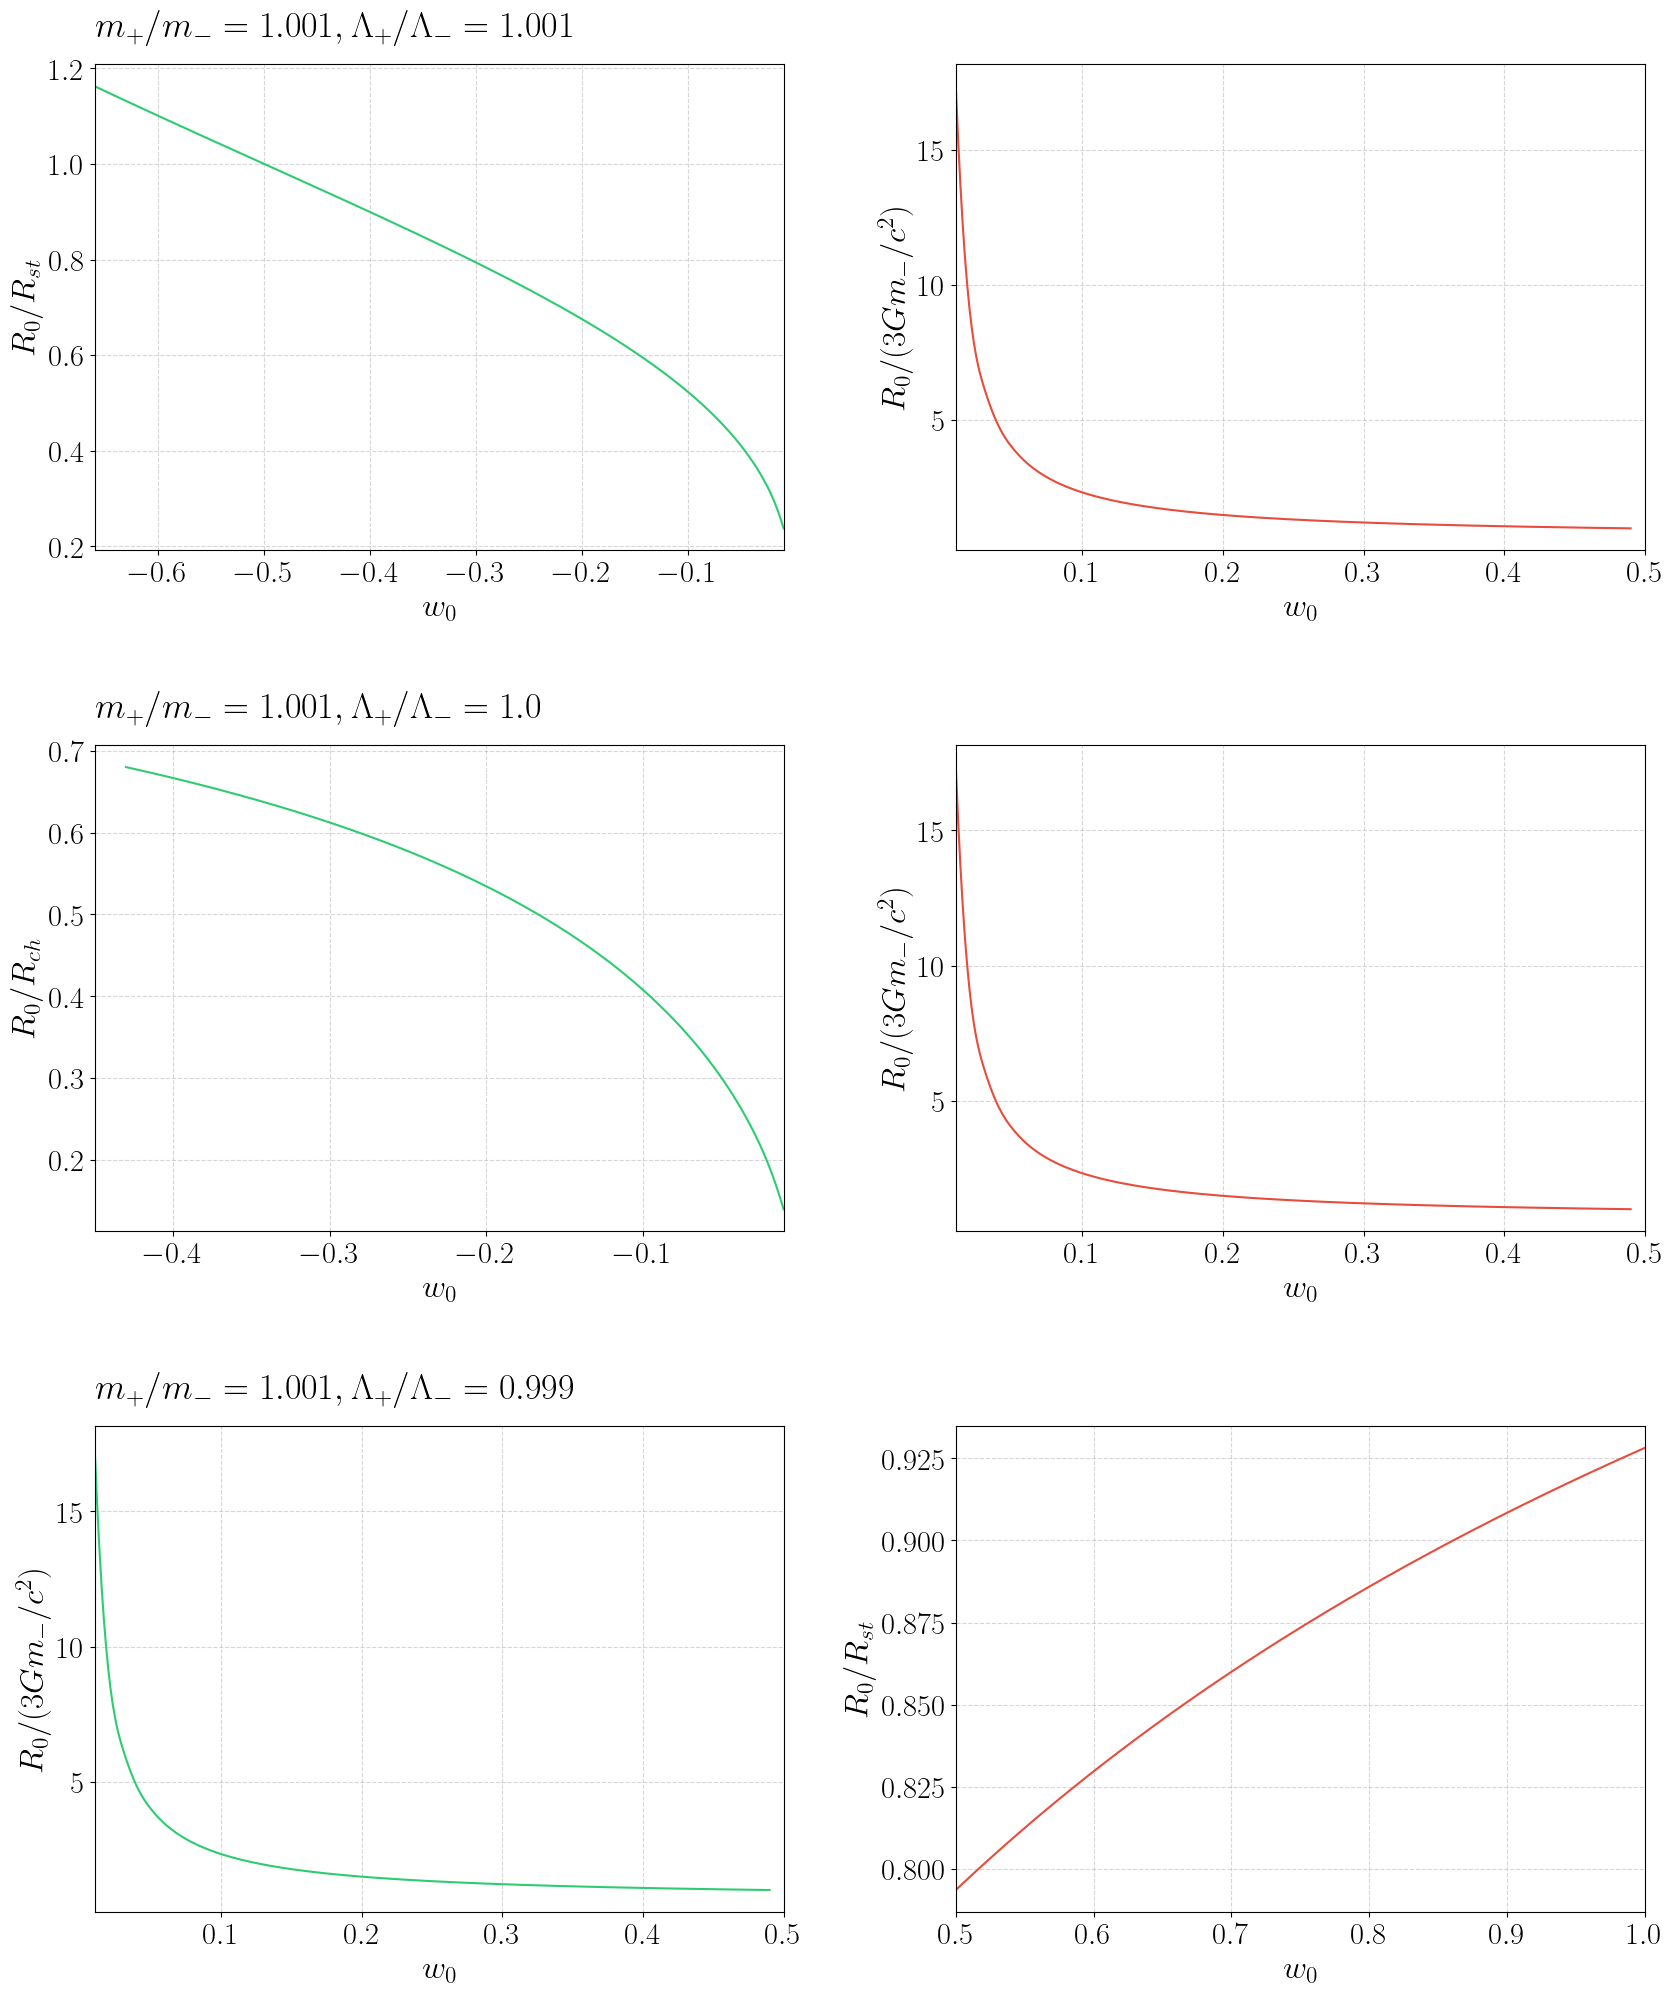

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_interp_spline


plt.rcParams['text.usetex'] = True # Set to True to use LaTeX fonts


TICK_FONTSIZE = 22        # <-- CHANGE tick numbers size here
AXIS_LABEL_FONTSIZE = 24  # <-- CHANGE x/y axis label size here
SUBTITLE_FONTSIZE = 22    # <-- CHANGE each subplot title size here
ROW_TITLE_FONTSIZE = 26   # <-- CHANGE big case title size here
NO_DATA_FONTSIZE = 22     # <-- CHANGE "No Data" text size here
# =====================================================


# ==========================================
# 1. SETUP & CONSTANTS
# ==========================================
G = 6.6743e-11
c = 299792.458e3
hplanck = 0.6770
H0pl = 3.23 * hplanck * 1e-18
rho_crit = (3 * H0pl**2) / (8 * np.pi * G)

m_minus = 1e10 * (1.988416e30)

# Cosmic Horizon Radius
R_ch_value = 1.3710e+26


# ==========================================
# 2. DEFINITION OF CASES
# ==========================================
cases = [
    {
        'title': r"$m_+/m_- = 1.001, \Lambda_+/\Lambda_- = 1.001$",
        'filename': 'qqp1.001.txt',
        'L_ratio': 1.001,
        'type': 'standard'
    },
    {
        'title': r"$m_+/m_- = 1.001, \Lambda_+/\Lambda_- = 1.0$",
        'filename': 'mrat1.001Lrat1.0.txt',
        'L_ratio': 1.0,
        'type': 'standard'
    },
    {
        'title': r"$m_+/m_- = 1.001, \Lambda_+/\Lambda_- = 0.999$",
        'filename': 'newq1.001qp0.999.txt',
        'L_ratio': 0.999,
        'type': 'bistable'
    }
]


# ==========================================
# 3. HELPER FUNCTIONS
# ==========================================
def get_scales(L_ratio):
    Lambda_plus = (8 * np.pi * G * rho_crit) / (c**2)
    Lambda_minus = Lambda_plus / L_ratio
    Lambda_avg = (Lambda_minus + Lambda_plus) / 2
    R_pr = (3 * G * m_minus) / (c**2)
    R_st = ((3 * G * m_minus) / (Lambda_avg * c**2))**(1/3)
    R_ch = R_ch_value

    return R_pr, R_st, R_ch


def load_data(filename, lambda_val=1.0):
    try:
        df = pd.read_csv(filename, sep='\t', header=None,
                         names=['Lambda', 'w', 'Stability', 'R0', 'Sigma0'])
    except:
        df = pd.read_csv(filename, delim_whitespace=True, header=None,
                         names=['Lambda', 'w', 'Stability', 'R0', 'Sigma0'])

    df = df.apply(pd.to_numeric, errors='coerce').dropna()
    stable = df[df['Stability'] == 1].copy()

    unique_lambdas = stable['Lambda'].unique()
    if len(unique_lambdas) > 0:
        closest_lam = unique_lambdas[np.argmin(np.abs(unique_lambdas - lambda_val))]
        return stable[np.isclose(stable['Lambda'], closest_lam)].copy()
    return pd.DataFrame()


def plot_line(ax, df, w_min, w_max, scale, scale_label, color, title=None):

    mask = (df['w'] >= w_min) & (df['w'] <= w_max)
    local = df[mask].sort_values('w')

    if local.empty:
        ax.text(0.5, 0.5, "No Data",
                transform=ax.transAxes,
                ha='center',
                fontsize=NO_DATA_FONTSIZE)
        return

    w_vals = local['w'].values
    r_vals = local['R0'].values / scale

    if len(w_vals) > 10:
        try:
            w_smooth = np.linspace(w_vals.min(), w_vals.max(), 300)
            spl = make_interp_spline(w_vals, r_vals, k=3)
            r_smooth = spl(w_smooth)
            ax.plot(w_smooth, r_smooth, color=color, linewidth=1.5)
        except:
            ax.plot(w_vals, r_vals, color=color, linewidth=1.5)
    else:
        ax.plot(w_vals, r_vals, color=color, linewidth=1.5)

    ax.set_xlim(w_min, w_max)


    ax.set_xlabel(r'$w_0$', fontsize=AXIS_LABEL_FONTSIZE)
    ax.set_ylabel(scale_label, fontsize=AXIS_LABEL_FONTSIZE)

    if title:

        ax.set_title(title, fontsize=SUBTITLE_FONTSIZE, pad=10)

    ax.grid(True, linestyle='--', alpha=0.5)


    ax.tick_params(axis='both', which='major', labelsize=TICK_FONTSIZE)

    ax.ticklabel_format(style='plain', axis='y')
    ax.yaxis.get_offset_text().set_visible(False)


# ==========================================
# 4. MAIN PLOTTING
# ==========================================
fig, axes = plt.subplots(3, 2, figsize=(20, 24))
plt.subplots_adjust(hspace=0.4, wspace=0.25)

color_neg = '#2ecc71'
color_pos = '#e74c3c'

for i, case in enumerate(cases):

    ax_left = axes[i, 0]
    ax_right = axes[i, 1]

    R_pr, R_st, R_ch = get_scales(case['L_ratio'])
    data = load_data(case['filename'])


    ax_left.set_title(case['title'],
                      loc='left',
                      fontsize=ROW_TITLE_FONTSIZE,
                      pad=20)

    label_pr = r'$R_0 / (3Gm_-/c^2)$'
    label_st = r'$R_0 / R_{st}$'
    label_ch = r'$R_0 / R_{ch}$'

    if case['type'] == 'standard':
        if i == 0:
            plot_line(ax_left, data, -0.66, -0.01,
                      R_st, label_st, color_neg)

        elif i == 1:
            plot_line(ax_left, data, -0.45, -0.01,
                      R_ch, label_ch, color_neg)

        plot_line(ax_right, data, 0.01, 0.5,
                  R_pr, label_pr, color_pos)

    elif case['type'] == 'bistable':

        threshold = 1e18
        df_small = data[data['R0'] < threshold]
        df_large = data[data['R0'] > threshold]

        plot_line(ax_left, df_small, 0.01, 0.5,
                  R_pr, label_pr, color_neg)

        plot_line(ax_right, df_large, 0.5, 1.0,
                  R_st, label_st, color_pos)


plt.savefig("Three_Cases_Final_Corrected.png",
            dpi=300,
            bbox_inches='tight')

plt.show()

Subplot a from figure 5, we import manually the critical epsilon, after calculating with:
  \begin{equation}
    \epsilon_{\rm crit} = \sqrt{V_{\rm eff}(R_{\rm hill}) - V_{\rm eff}(R_0)}.
\end{equation}


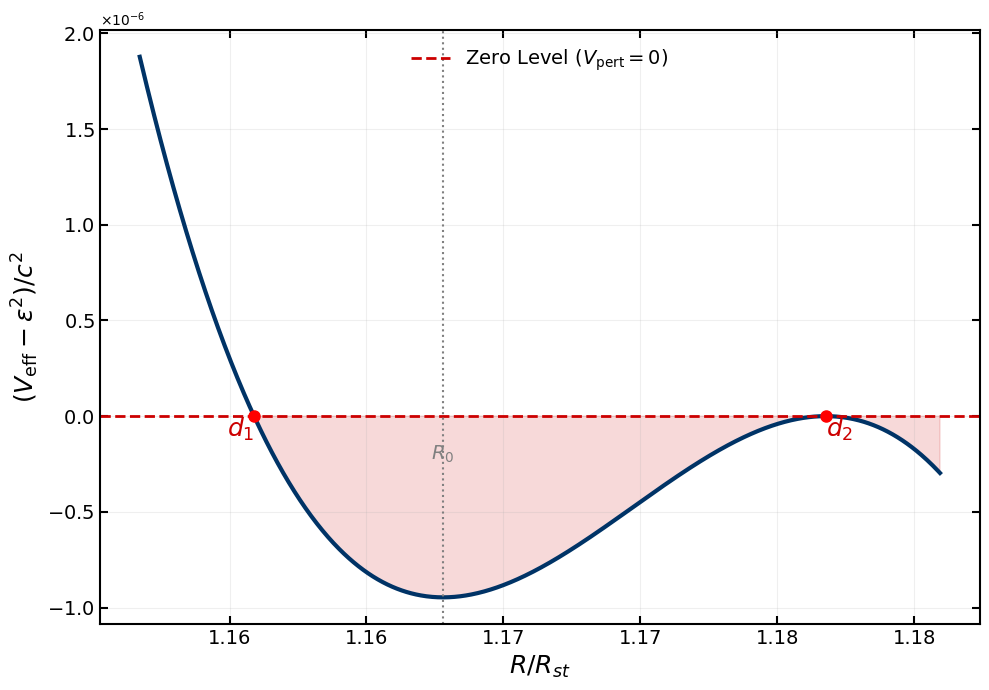

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import minimize_scalar, brentq

# 1. PHYSICAL CONSTANTS
G = 6.6743e-11
c = 299792.458e3
m_minus = 1e10 * (1.988416e30)
m_plus = 1.001 * m_minus
hplanck = 0.6770
H0pl = 3.23 * hplanck * 1e-18
rho_crit_pl = (3 * H0pl**2) / (8 * np.pi * G)

# 2. SYSTEM PARAMETERS
Lambda_minus = ((8 * np.pi * G * rho_crit_pl) / c**2) * (1/1.001)
Lambda_plus = (8 * np.pi * G * rho_crit_pl) / c**2
Lambda_avg = (Lambda_minus + Lambda_plus) / 2

lam = 1.0
w0 = -0.66
R0 = 7.586121094208997e21
sigma_sol = 4.909868011963678e-8

# Calculate Scaling Radius Rst
R_st = ((3 * G * m_minus) / (Lambda_avg * c**2))**(1/3)

# 3. V_eff Function
def Veff(R):
    term1 = (2*G*m_minus)/(c**2 * R)
    term2 = (2*G*m_plus)/(c**2 * R)
    term3 = (R**2 * Lambda_minus)/3
    term4 = (R**2 * Lambda_plus)/3
    Gamma = 6*G*(m_minus - m_plus) + c**2 * R**3 * (Lambda_minus - Lambda_plus)
    num_inter = (1 + lam)**2 * Gamma**2
    D_core = R0**2 * (R0/R)**(2*lam) * (1 + w0) + R**2 * (-w0 + lam)
    den_inter = 288 * G**2 * np.pi**2 * D_core**2 * sigma_sol**2
    brackets = -w0 + (R0/R)**(2*(1 + lam))*(1 + w0) + lam
    term_surf_num = 8 * G**2 * np.pi**2 * R**2 * brackets**2 * sigma_sol**2
    term_surf_den = c**4 * (1 + lam)**2
    # Result in (m/s)^2
    val = 0.25 * c**2 * (2 - term1 - term2 - term3 - term4 - num_inter/den_inter - term_surf_num/term_surf_den)
    return val

# 4. FIND THE HILL (Unstable Equilibrium)
def neg_Veff(R): return -Veff(R)

# Search bounds: from R0 out to 2*R0
res_max = minimize_scalar(neg_Veff, bounds=(R0*1.01, R0*2.0), method='bounded')
R_hill = res_max.x
V_hill_val = Veff(R_hill)

# 5. SET ENERGY MANUALLY
epsilon_input = 291715 # m/s (Critical Velocity)
Target_Energy = Veff(R0) + epsilon_input**2

# 6. FIND LEFT TURNING POINT (d1)
def root_func(R): return Veff(R) - Target_Energy

try:
    R_left = brentq(root_func, R0*0.5, R0)
except ValueError:
    R_left = R0 * 0.9

R_right = R_hill # d2 is by definition the hill

# 7. GENERATE DATA
width = R_right - R_left
R_start = R_left - 0.2 * width
R_end = R_right + 0.2 * width
R_vals = np.linspace(R_start, R_end, 1000)

y_vals = (np.array([Veff(r) for r in R_vals]) - Target_Energy) / c**2
x_vals = R_vals / R_st

x_left = R_left / R_st
x_right = R_right / R_st
x_0 = R0 / R_st

# 8. PLOTTING
fig, ax = plt.subplots(figsize=(10, 7))


ax.plot(x_vals, y_vals, linewidth=3, color='#003366')

# Zero Level Line
ax.axhline(0, color='#cc0000', linestyle='--', linewidth=2, label=r'Zero Level ($V_{\rm pert}=0$)')

# Shading
ax.fill_between(x_vals, y_vals, 0, where=(y_vals < 0), color='#cc0000', alpha=0.15)

# Points
ax.plot([x_left, x_right], [0, 0], 'ro', markersize=8)

# Annotations
text_offset = np.min(y_vals) * 0.15
ax.text(x_left, text_offset, r'$d_1$', ha='right', va='bottom', color='#cc0000', fontsize=18, fontweight='bold')
ax.text(x_right, text_offset, r'$d_2$', ha='left', va='bottom', color='#cc0000', fontsize=18, fontweight='bold')

ax.axvline(x_0, color='gray', linestyle=':', linewidth=1.5)
ax.text(x_0, text_offset, r'$R_0$', ha='center', va='top', color='gray', fontsize=14)

# Axis Labels
ax.set_xlabel(r"$R/R_{st}$", fontsize=18)
ax.set_ylabel(r"$(V_{\rm eff} - \epsilon^2)/c^2$", fontsize=18)

# Formatting for Paper
ax.tick_params(direction='in', top=True, right=True, which='both', length=6, width=1.5, labelsize=14)
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

ax.grid(True, alpha=0.2)
ax.legend(frameon=False, fontsize=14, loc='upper center')

plt.tight_layout()
plt.savefig('bounded_excursion_paper.png', dpi=300)
plt.show()